In [1]:
import torch
import numpy as np

data_path_train = "../dataset/sign_mnist_train.csv"
data_path_test  = "../dataset/sign_mnist_test.csv"

arr_train = np.loadtxt(data_path_train, dtype=np.float32, delimiter=',', skiprows=1)
arr_test = np.loadtxt(data_path_test, dtype=np.float32, delimiter=',', skiprows=1)

tensor_train = torch.from_numpy(arr_train)
tensor_test = torch.from_numpy(arr_test)

# dataset_train = [(row[1:].to(torch.float64).reshape(28, 28).unsqueeze(0), row[0].item()) for row in tensor_train]
# dataset_train = [(row[1:].reshape(28, 28).unsqueeze(0), row[0].to(torch.int).item()) for row in tensor_train]
dataset_train = [(row[1:].reshape(28, 28).unsqueeze(0), row[0].item()) for row in tensor_train]
dataset_test = [(row[1:].reshape(28, 28).unsqueeze(0), row[0].item()) for row in tensor_test]

In [2]:
dataset_train = [(img/255.0, int(label)) for (img, label) in dataset_train]
dataset_test = [(img/255.0, int(label)) for (img, label) in dataset_test]

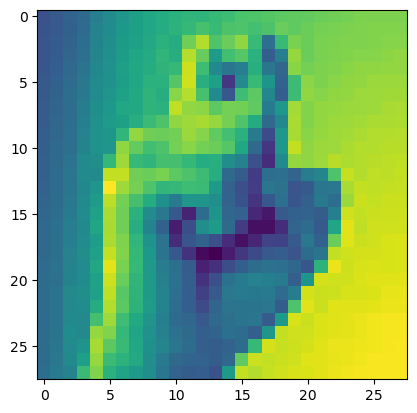

In [3]:
img, lbl = dataset_train[23]

from matplotlib import pyplot as plt
plt.imshow(img.permute(1,2,0))

In [3]:
from torchvision.utils import save_image

counter = 0

for (img, label) in dataset_train:
    # save_image(img, "./dataset_for_yolo/train/images/img" + str(counter) + ".jpg")
    f = open("./dataset_for_yolo/train/labels/img" + str(counter) + ".txt", "w")
    f.write("" + str(label) + " 0.5 0.5 1.0 1.0")
    f.close()
    counter += 1